# Lab Week 6 Solution

## EOSC 211


### Learning Objectives:

1. Develop algorithms involving loops.
2. Carry out a top-down design process.
3. Work with *time-series* data.
4. Modularize code, separating the algorithm from input/output statements.
5. Solve a problem useful in the earth sciences.

In [1]:
from e211_lib import e211
import numpy as np
from matplotlib import pyplot as plt

## Intro

In this lab, we will be working with *time series data*, and apply our programming skills with loops to create a series of *filters*, that remove unwanted or erroneous features in our data. Time series are one of the most common types of data sets we expect to encounter, so we would like our filtering algorithm to work for not just one particular dataset, but *any* time series that can be read as a numpy array. **You will have to adapt the filtering code which you develop for this lab later in the semester for Assignment 1**, so it's best if you implement it well and understand how it works. 
___

## Part 1 - Notes on Time Series Data

We expect to encounter these datasets a lot throughout EOAS, so it's worth taking some time to practice with some computational tools that will make parsing dates and times cleaner and easier. A *time series* in general is a measurement in time taken repeatedly with the time or time interval recorded (e.g. temperature at a weather station, wave height at a buoy, flow in a stream -- many, many earth science experiments produce time series data). The output is a list (or array) of dates/times, and a list of one or more repeatedly measured quantity. 

The first issue we encounter when wrangling the data produced from these experiments is that there is no single way of writing out a date/time. For example in the table below, each rows represent the same date and time.

| | |
|:----:|:---:|
|10:03:00PM Oct 22/2021| Arbitrary
|738085| Ordinal
|'2021-10-22T22:03:00'| ISO format
|100 minutes since launch| Mission elapsed time (MAP)
|1634965380| POSIX/timestamp
 
There are many Python libraries for dealing with dates and times, with the default being the built-in `datetime` module that comes with every Python installation. For this course, we'll focus on using the `datetime` module. Let's start by importing the necessary `datetime` modules:

In [2]:
from datetime import datetime
from datetime import timedelta

`datetime` defines it's own object types: `datetime.date`, `datetime.time`, or `datetime.datetime`. Some sample conversions to `datetime.datetime` are provided below. If you get stuck later in the lab, the docs for the datetime library can be found [here](https://docs.python.org/3/library/datetime.html#).

In [3]:
# ISO format
my_date1 = datetime.fromisoformat('2021-10-22T22:03:00') 


# POSIX time (seconds elapsed since 00:00, Jan 1 1970)
# commonly used since you can store the whole date as an int
# also sometimes called UNIX timestamp or UNIX epoch
my_date2 = datetime.fromtimestamp(1634965380) 


# ordinal time, number of days since year 0 AD.
# note this just keeps the date, omits time
my_date3 = datetime.fromordinal(738085)       


# MAP
launch_date = datetime(2021, 10, 22, 20, 23) # whenever the experiment started (yr, mth, day, hr, min)
my_date4 = launch_date + timedelta(minutes = 100) # 100 minutes after that


# convert an arbitrary string to a datetime object, given
# a specified format. See the docs for details
my_date5 = datetime.strptime("10:03:00 PM Oct 22/2021", "%I:%M:%S %p %b %d/%Y") 
  
    
# all of the above give the same value for my_date
print(f'From ISO: \t{my_date1}')
print(f'From POSIX: \t{my_date2}')
print(f'From ordinal: \t{my_date3}')  # note this conversion gives time 00:00:00
print(f'From MAP: \t{my_date4}')
print(f'From string: \t{my_date5}')

From ISO: 	2021-10-22 22:03:00
From POSIX: 	2021-10-22 22:03:00
From ordinal: 	2021-10-22 00:00:00
From MAP: 	2021-10-22 22:03:00
From string: 	2021-10-22 22:03:00


### Your Task

Import this weeks dataset `aircraft_gps.npz`. To load the .npz file, use `np.load()` which will output a dictionary containing *keys* "vel" and "time", and corresponding *values* of aircraft velocity and time, respectively. Loop through the data, converting the "time" values to datetime objects. A good way to start is to assign the values in "vel" a numpy array, and similarly define a second numpy array that contains the times.

You will need to look at provided times and decide in which format they are saved. The time format you identify will  inform which `datetime` function you need to use for conversion. The code cell above contains examples of different `datetime` conversion functions to choose from.

In [4]:
### BEGIN SOLUTION

# Here are 4 different ways to do this task

# andrew's soln

# load data 
data_in = np.load("aircraft_gps.npz")
vel = data_in["vel"]
time = data_in["time"]

print(f"Times: {time}")
fly_time = np.empty_like(time, dtype = "O")

for index, tt in enumerate(time):
    fly_time[index] = datetime.fromtimestamp(tt)

print(f'Andrew: From aircraft file: \t{fly_time}')


# catherine's soln

# load data 
data_in = np.load("aircraft_gps.npz")
vel = data_in["vel"]
time = data_in["time"]

fly_time = np.empty_like(time, dtype="O")

for index in range(len(time)):         # closer to what we worked with in worksheets; Andrew's is more elegant
    fly_time[index] = datetime.fromtimestamp(time[index])
 
print(f'Catherine: From aircraft file: \t{fly_time}')

#Francis' solution
data_in = np.load("aircraft_gps.npz")
vel = data_in["vel"]
time = data_in["time"]

fly_time = np.array([datetime.fromtimestamp(tt) for tt in time])  # CJ's comment on this = 'very elegant' :)

print(f'Francis: From aircraft file: \t{fly_time}')

# and one more way
data_in = np.load("aircraft_gps.npz")
vel = data_in["vel"]
time = data_in["time"]

# The ‘loop-through-times-and-append-to-list’ way without any preallocation would be:
fly_time = []
for tt in time: 
    fly_time.append(datetime.fromtimestamp(tt))  # a list
fly_time = np.array(fly_time)  # an array if u want
print(f'Version 4: From aircraft file: \t{fly_time}')


### END SOLUTION

Times: [1.02151829e+09 1.02151829e+09 1.02151829e+09 ... 1.02152478e+09
 1.02152478e+09 1.02152478e+09]
Andrew: From aircraft file: 	[datetime.datetime(2002, 5, 15, 20, 4, 49, 440005)
 datetime.datetime(2002, 5, 15, 20, 4, 50, 439999)
 datetime.datetime(2002, 5, 15, 20, 4, 51, 440004) ...
 datetime.datetime(2002, 5, 15, 21, 53, 0, 430003)
 datetime.datetime(2002, 5, 15, 21, 53, 1, 429998)
 datetime.datetime(2002, 5, 15, 21, 53, 2, 430002)]
Catherine: From aircraft file: 	[datetime.datetime(2002, 5, 15, 20, 4, 49, 440005)
 datetime.datetime(2002, 5, 15, 20, 4, 50, 439999)
 datetime.datetime(2002, 5, 15, 20, 4, 51, 440004) ...
 datetime.datetime(2002, 5, 15, 21, 53, 0, 430003)
 datetime.datetime(2002, 5, 15, 21, 53, 1, 429998)
 datetime.datetime(2002, 5, 15, 21, 53, 2, 430002)]
Francis: From aircraft file: 	[datetime.datetime(2002, 5, 15, 20, 4, 49, 440005)
 datetime.datetime(2002, 5, 15, 20, 4, 50, 439999)
 datetime.datetime(2002, 5, 15, 20, 4, 51, 440004) ...
 datetime.datetime(2002, 5

# ___
## Part 2 - Creating a Running Mean Algorithm Using `for` Loops

It is often very useful to be able to *smooth* a time series to better display broad trends by averaging away the short-time variability. A simple, effective way of smoothing a time series is to use a *running mean*. Imagine that $N$ data points are recorded hourly, and number them 1,2,3,. . .,$i$−1, $i$, $i$ + 1,. . .,$N$ as they appear in an array. If we are calculating a 5 point running mean, then the 5th point in the *smoothed* time series will be the average of points 3, 4, 5, 6 and 7 from the original time series (from “two-to-the-left” to “two-to-the-right”).  The 6th point in the smoothed time series will be the average of points 4, 5, 6, 7,and 8 from the original time series. The 7th point will be the average of points 5, 6, 7, 8, and 9. And so on, moving over one point each time, with your window *running* through the time series, calculating the average of the points in the window at each point in the original series (Fig. 2).
___


<img src="runningmean.png" width="60%">


<p style="text-align: center;">   
**Fig 1**: An example of the 5 point running mean. The $i$th element of $z$ will be 9.2, an average of 1, 12, 21, 7, and 5. The next element will be 9.4, an average of 12, 21, 7, 5, and 2, and so on.</p>

___
How de we describe this mathematically? Formally, we start with a time series vector $x$, whose $i$th element is $x_i$ where $i= 1. . . N$.  Then we form a new time series $z$, again with $N$ elements, for which the $i$th point $z_i$ is an average of points in $x$ within the window. If the window has a length of 5, then:

$$
z_i = \frac{x_{i-2} + x_{i-1} + x_{i} + x_{i+1} + x_{i+2}}{5}\tag{1}
$$

$$
z_i = \frac{1}{5}\sum_{k=-2}^2 x_{i+k}\tag{2}
$$

and if it has a length $L$ (which has to be an odd number) then it would be:

$$
z_i = \frac{1}{L}\sum_{k=-W}^Wx_{i+k}\tag{3}
$$

where:

$$
W = \frac{L-1}{2}\tag{4}
$$

**Your task is to implement these equations in Python and use them to filter the time series data provided.** We would like our code to be re-useable and somewhat flexible, so we don’t just program the long sum of 5 points in eqn. (1), because we may want to change the length of the window later on - we want the window length, $L$, as another input parameter. This is because we might want a 3 point running mean, or a 9 point running mean.

In this lab, you will use loops to code up eqn. (3). To write the required code, we will break the problem down into a series of steps, which you will follow as you go through the lab:

>1) First, develop a basic algorithm, using a `for` loop to run through each element $x_i$ in the an arbitrary series `x` that you define. (This can be done correctly in a few different ways). For now, just print $x_i$ to the screen, or perform some other very simple operation inside the loop. 

>2) Inside the first loop, replace your very simple operation with another `for` loop which calculates the windowed mean centered around the point $x_i$ (i.e. implement equation 2 in code). You will need to specify a window length $L$, which needs to be an **odd number**. If we are going to take $L$ as a user-specified variable, what could you do to ensure that the $L$ used in your algorithm is indeed an odd number? (Multiple correct approaches) 
>*Note: Numpy has a built-in function `np.mean()` for calculating the mean of an array, but don't use it here. The point of this lab is to practice with loops. DIY.*

>3) Next, add some `if` statements to handle the awkward cases that take place at the start and end of the loop. (Again, multiple correct approaches, although some are better than others).

>4) In order to make really sure you have implemented the algorithm correctly, test it on some simple data for which you can work out the answer by hand. For example, set `x=[1 5 3 7 9 8 4 6]`, `winlen=3`, and work out BY HAND what the answer should be. Check to see if your program replicates the solution you worked out by hand. Try different window lengths and see what happens.

>4) Apply your filtering algorithm to the aircraft dataset provided and display the results with a scientific figure as aircraft velocity vs. time. Make sure to use your converted times from **Part 1**. Include on your plot both the raw aircraft velocity and mean filtered velocity.

N = 6464, L = 5, W = 2
special end case at point i = 0
special end case at point i = 1
special end case at point i = 6462
special end case at point i = 6463


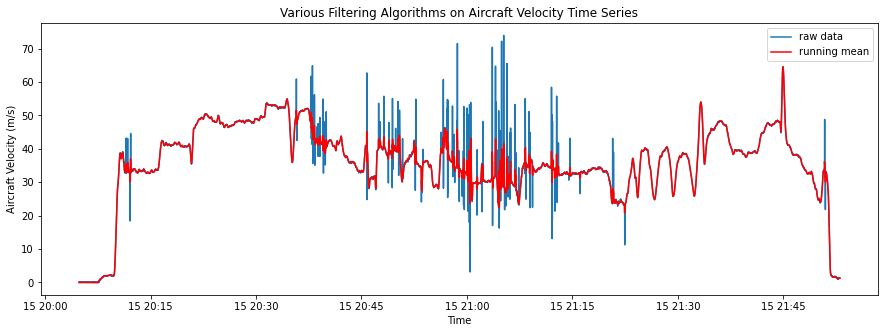

In [5]:
### BEGIN SOLUTION
# Catherine's solution

ndat = len(vel)
winlen = 5
ww = int((winlen-1)/2)
print(f'N = {ndat}, L = {winlen}, W = {ww}')

z = np.zeros_like(vel, dtype="O")

for i in range(ndat):
    if ((i<ww) or (i>ndat-ww-1)):    # be careful with the limits!
        print(f'special end case at point i = {i}')   #print statements to check what is in the special end cases
        z[i] = vel[i]                # at ends just set running mean equal to unfiltered value
    else:                            # running mean is executed from ww to ndat-1-ww inclusive   
        for j in range(-ww,ww+1):
            z[i] += vel[i+j]
        z[i] = z[i]/winlen

 # plot it all
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(fly_time, vel, label="raw data")
ax.plot(fly_time, z, label="running mean", color="red")
ax.set_xlabel("Time")
ax.set_ylabel("Aircraft Velocity (m/s)")
ax.set_title("Various Filtering Algorithms on Aircraft Velocity Time Series")
ax.legend();  
### END SOLUTION

___
## Part 3 - The Running Median and `while` Loops

In this section, your task is to add to/modify your code to calculate the *running median* instead of the *running mean* for a given window size.  


Why would you use a running median instead of a running mean? For example for most temperature datasets, most (or all) of the data is correct, or at least not wildly and obviously wrong. This is generally untypical of "real" data, which often show very intermittent obviously erroneous measurements (outliers) for various reasons. The aircraft dataset contains such errors. We know that the speed of a plane tends to vary smoothly between something like 30 to 50 m/s, but there are strange spikes in the series (especially in the middle part of the time series when the plane is turning a lot), related to changes in the paths of radio-wave propagation when the aircraft changes its orientation and certain parts of the sky are obscured. These are clearly “bad data” because the speed of anything real won’t change by 20 m/s for only one second (the airplane's wings would fall off from the violent acceleration). Now, if  we  were  interested  in  the  speed,  taking  a  running  mean  will  not  really  help  matters because it tends to pull the smooth curve away from the “correct” points.   Because the median is more robust to outliers than the mean, the running  median can  reject  these outliers if the provided window length is long enough. 

A running median works much like a running mean, except that inside the window, we calculate the **median** of a dataset instead of the **mean**. For a refresher on *central tendencies of a dataset*, click [here](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/mean-median-basics/a/mean-median-and-mode-review). To calculate the median of a dataset:

>1) Start with all an array of numbers `x` as above, and select a window like you did for the running mean above.

>2) Using a `while` loop, eliminate both the highest and lowest numbers from your current window until you are left with only the middle-valued element in the window -- the *median*. (You need an window of odd length for this to work).

>3) Once your window only contains one number (the median) save it to the $i$th element of a new array which will contain your running median. 

>4) Move the window over and repeat. 

>5) Test your algorithm the same way you did with the running mean (do it by hand on a small dataset). When working properly the spikes will be removed from the aircraft time series with a window length of 7.

___
### To hand in:

<div class="alert alert-block alert-info">  
    
**1:  Combine your code from Parts 1 to 3 to create a *scientific figure* which displays:**  
- [ ] The raw aircraft velocity data as a function of (converted) time.
- [ ] The data filtered by your running mean algorithm with a window length of 7.  
- [ ] The data filtered by your running median algorithm, also with a window length of 7. 
___
    
**2:  A brief analysis (4-6 sentences)** commenting on how well each time series (raw, mean filtered, median filtered) represents the actual flight of the aircraft. Which method does the best job? 
    
___ 
    
**3:** Your code should follow our standard *input/import, process, display* structure, and include lots of commenting to show what is happening where.  
</div>

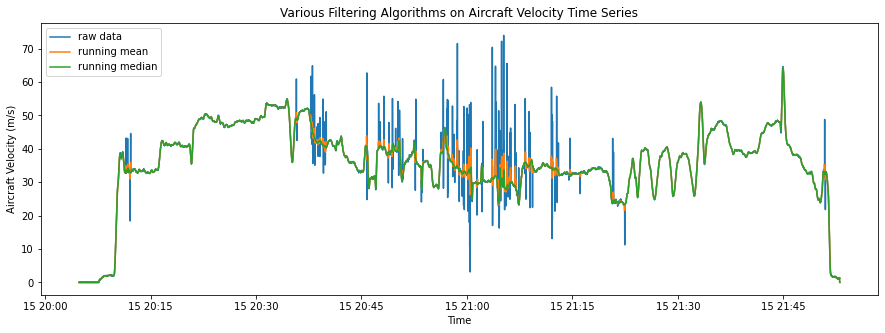

In [6]:
### BEGIN SOLUTION
# andrew's soln

winlen = 7  # L from equation 3
window_ind = int((winlen - 1) / 2)  # equation 4

# discuss this vs the np.append() approach
z = np.zeros_like(vel)
zm = np.zeros_like(vel)
# y = np.zeros_like(vel)
# ym = np.zeros_like(vel)

# the crux here is remembering that range(a,b) and/or [a:b] are INCLUSIVE of a and EXCLUSIVE of b
# not recoginizing this will give you the wrong answer
for i in range(window_ind, len(vel) - window_ind):  # deal with the edges by ignoring them
    # mean
    for k in range(i - window_ind, i + window_ind + 1):
        z[i] += vel[k] / winlen  # eqn 2

    # median
    window = list(vel[i - window_ind : i + window_ind + 1])
    while len(window) > 1:
        window.remove(max(window))
        window.remove(min(window))
    zm[i] = window[0]
    

    # the numpy functions do it faster -- more on this in later labs (hopefully)
    # y[i] = np.mean(vel[i - window_ind : i + window_ind + 1])
    # ym[i] = np.median(vel[i - window_ind : i + window_ind + 1])
    
# output comparing the raw data and two smoothing techniques
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(fly_time, vel, label="raw data")
ax.plot(fly_time, z, label="running mean")
ax.plot(fly_time, zm, label="running median")
ax.set_xlabel("Time")
ax.set_ylabel("Aircraft Velocity (m/s)")
ax.set_title("Various Filtering Algorithms on Aircraft Velocity Time Series")
ax.legend();

# **Analysis:**

# *The running mean does a reasonably good job of smoothing out the data, but still includes data from
# the "spikes" (it just makes the spikes smaller). The running median ignores the spikes entirely, as
# medians are less sensitive to outlier data.*

# *An even better approach would be to detect areas of the data where the plane's accelerations are
# beyond some threshhold value and eliminate the "spikes" completely from the dataset, then apply the
# running mean or median algorithms.*


### END SOLUTION